# Recuperación de la Información y Minería de Texto
# Análisis de noticias

Práctica desarrollada por :

    Cesar González Fernández [cesar.gon.fer@gmail.es]
    Carlos Correa García [carlos.correa.88@gmail.es]

## Índice

1. [Introducción](#introduction)
2. [Casos analizados y ejecutados](#cases)
3. [Conclusiones](#conclusions)

<a id='introduction'></a>
# 1. Introducción

A lo largo de esta práctica, vamos a modelizar y testear diferentes representaciones sobre diferentes noticias recogidas de algunos de los periódicos más influyentes de hoy en día. Esto es, analizaremos diferentes formas de representar un texto como un conjunto de términos que identifiquen a los documentos. De esta forma, al aplicar un algoritmo de clustering sobre esos conjuntos de términos, clasificaremos las noticias mediante la similitud entre términos y obtendremos un resultado de pertenencia a determinados clusters de los diferentes documentos.

Una vez obtenida esa agrupación, mediremos la potencia de la solución mediante la diferencia coseno con el vector de clúster real, donde se representa a qué cluster deben pertenecer las noticias por su temática.

Para ello, utilizaremos dos de las bibliotecas para Python más conocidas de NLP (Natural Language Processing):

* **NLTK** 
* **Spacy**

<div class  = "alert alert-info"> 
Si desea más información de NLTK y Spacy, es posible visitar los siguientes enlaces: [
NLTK: https://www.nltk.org/]
[Spacy: https://spacy.io/]
</div>

Incluimos las bibliotecas y referencias que van a ser necesarias, entre las que destacan además de nltk y spacy, numpy y sklearn.

In [1]:
from time import time
import os
import pprint
import re

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import *
from sklearn.metrics.cluster import adjusted_rand_score
import nltk
import numpy
import spacy

Así como algunas funciones programadas por nosotros y que se explicarán en el anexo.

In [2]:
from practica import *
from utils.parser import html2txt_parser_dir

Para comparar el vector resultado de nuestras pruebas con el resultado real esperado, creamos la variable REFERENCE con la información de clusters. Cada elemento de esta lista corresponde con el identificador de cluster al que pertenece. Si nos paramos a echar un vistazo a las noticias, veremos como efectivamente, la noticia 1, 3, 4, 5 y 20 tratan sobre el mismo tema. De igual manera la noticia 2, 10, 11, 12, 13, 14 y 22, y así sucesivamente.
También se ha creado un vector de idiomas si más razón de ser que la de poder imprimirlo junto con los resultados y poder ver la influencia de estos más claramente.

In [3]:
REFERENCE = [0, 5, 0, 0, 0, 2, 2, 2, 3, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 0, 2, 5]
LANG_REF = ['E', 'E', 'E', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'E', 'E', 'E',    
            'S', 'E', 'E', 'S', 'E', 'E', 'E', 'E', 'S'] 

Además, nos hará falta cargar una variable con las utilidades y diccionario de Spacy en el idioma inglés:

In [4]:
nlp = spacy.load('en')

<a id='cases'></a>
# 2. Casos analizados y ejecutados

Hemos analizado diferentes casos, aplicando sobre el texto diferentes transformaciones y analizando resultados, y así ir aplicando sobre el texto las métricas que mejor se comportan en reconocimiento de texto. Comenzamos con el más sencillo, como es simplemente tokenizar, y terminaremos con la obtención de entidades nombradas y nombres más comunes para obtener su frecuencia booleana.

## 2.1 Tokenización

En primer lugar vamos a empezar por lo más facil, el texto sin trarar. Únicamente necesitamos tokenizar el texto tal cual lo tenemos. Sobre estos tokens, la función de clusterización será capaz de calcular el clustter de cada texto.

Al ser esta el primer caso y el más sencillo, podemos ver claramente en que consisten estás funciones, a los que llamamos casos, en los que hemos dividido el código para hacerlo más fácil de seguir. Los casos esperan recibir como parámetro un fichero, el cuál procesan haciendo uso de funciones externas (consiguiendo así reutilizar código entre diferentes casos) y devolveran una lista con los tokens del texto ya procesado.

In [5]:
def word_tokenize(in_):
    s = in_ if isinstance(in_, str) else in_.read()
    return nltk.word_tokenize(s)

In [6]:
def case_1(f_):
    """ Ninguna transformación. """

    return word_tokenize(f_)

In [7]:
print('Score: ', evaluate(case_1))

Creando collecion de 18915 terminos
Terminos unicos encontrados:  4706


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,4,0,1,0,0,0,0,1,1,0,3,3,1,0,0,1,0,0,2,0


Tiempo total de ejecución 1.22 segundos
Score:  0.008040201005025135


Como vemos, con esta primera aproximación la puntuación obtenida es muy baja. Esto era de esperar ya que estamos usando todas las palabras del texto, las cuales incluyen las más comunes de ambos lenguajes (como determinantes y preposiciones) además de no traducir los textos a un lenguaje en común, lo que hace muy dificil que coincidan palabras de textos de idimas diferentes a pesar de tratar el mismo tema.

## 2.2 Transformación de tokens a minúsculas

Por lo que extraemos del ejemplo anterior, la tokenización es un método que, sin combinarlo con otros, es bastante malo, puesto que incluso si se obtiene la misma palabra en dos documentos pero difiere una letra minúscula de una mayúscula, el algoritmo de clusterización no va a encontrar similaridad entre ambas palabras, por lo que el ruido entre documentos es mayor.

Es por eso por lo que "normalizamos" todos los tokens a minúscula. De esta forma, obtendremos muy probablemente un número menor de palabras diferentes y por lo tanto, unos clústers un poco mejor definidos.

In [8]:
def to_lower_case(tokens):
    return [t.lower() for t in tokens]

In [9]:
def case_2(f_):
    """ Convierte los tokens a minusculas. """

    tokens = word_tokenize(f_)
    return to_lower_case(tokens)

In [10]:
print('Score: ', evaluate(case_2))

Creando collecion de 18915 terminos
Terminos unicos encontrados:  4469


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,4,0,1,0,0,0,0,1,1,0,3,3,1,0,0,1,0,0,2,0


Tiempo total de ejecución 1.12 segundos
Score:  0.008040201005025135


Aún habiendo aplicado la transformación a minúsculas, vemos que el Score es muy bajo, por lo que debemos aplicar métricas para obtener similaridades entre documentos algo más complejas.

## 2.3 Eliminación de signos de puntuación (aplicando el punto anterior)

Los signos de puntuación no añaden significado al texto y son usados en todos, tanto en español como en inglés. Además, el número de repeticiones de estos caracteres es muy grande. Esto evidentemente provoca que otras palabras más significativas pierdan peso

In [11]:
def remove_puntuation(tokens):
    import string

    return [t for t in tokens if t not in string.punctuation]

In [12]:
def case_3(f_):
    """ Convierte a minusculas y elimina signos de puntuacion. """

    tokens = word_tokenize(f_)
    tokens = to_lower_case(tokens)
    return remove_puntuation(tokens)

In [13]:
print('Score: ', evaluate(case_3))

Creando collecion de 17487 terminos
Terminos unicos encontrados:  4451


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,1,0,3,0,4,0,0,3,3,1,1,1,3,0,0,3,0,0,2,0


Tiempo total de ejecución 1.03 segundos
Score:  0.12794612794612795


Podemos ver que la puntuación tras eliminar los signos de puntuación a aumentado, pero aún está lejos de ser un valor aceptable. Esta mejora es debida a el mayor peso que se da a otros tokens más significativos.

## 2.4 Eliminación de stopwords en inglés y español (aplicando el punto anterior)

Una vez eliminados los signos de puntuación, que no aportan ningún valor añadido a nuestro análisis de textos, nos puede venir a la mente la idea de eliminar más palabras de nuestros textos que no aportan ningún significado extra al documento y que además, se repiten constantemente en diferentes frases; son las que se denominan "stopwords". Dentro de este conjunto de palabras se encuentran las conjunciones, preposiciones, algunos verbos auxiliares, etc.

Para ello, utilizaremos la lista de palabras que nos proporciona el corpus stopwords de la biblioteca **nltk**:

Estas son las stopwords que eliminaremos del inglés:

In [14]:
print (nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Y las del español:

In [15]:
print (nltk.corpus.stopwords.words('spanish'))


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosostros', 'vosostras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 

In [16]:
def remove_stop_words(tokens, langs = ['english']):
    return [t for t in tokens if t not in nltk.corpus.stopwords.words(langs)]

In [17]:
def case_4(f_):
    """ Lo anterior y elimina las stopwords es español e ingles. """

    tokens = word_tokenize(f_)
    tokens = to_lower_case(tokens)
    tokens = remove_puntuation(tokens)
    return remove_stop_words(tokens, langs=['english', 'spanish'])

In [18]:
print('Score: ', evaluate(case_4))

Creando collecion de 10013 terminos
Terminos unicos encontrados:  4221


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,2,0,1,0,0,0,0,4,3,2,2,2,3,0,0,1,0,0,0,0


Tiempo total de ejecución 5.10 segundos
Score:  0.20920502092050208


Tras eliminar todas las stopwords, vemos que el Score obtenido es mayor a ninguna de las anteriores ejecuciones, por lo que mantendremos la tokenización y la eliminación de signos de puntuación y stopwords a lo largo de nuestro análisis de textos.

## 2.5 Traducción con TextBlob (aplicando el punto anterior)

Como hemos podido ver en los casos anteriores, los clusteres siempre se han agrupado dando prioridad en primer lugar al idioma y después al tema. Esto es lógico, es complicado que entre dos textos en idiomas diferentes existan más terminos coincidentes que entre dos de idiomas diferentes. Estos terminos se ven limitados a poco más que nombres propios, fechas o palabras que compartan ambos idiomas.
Es por esto que el siguiente paso lógico es el traducir todos los textos al mismo idioma. Ya que la mayor parte de los textos están en inglés, y que los paquetes con los que trabajamos son más potentes cuando trabajan con este idioma, el sentido de la traducción que usaremos será de español a inglés:

In [19]:
def translate_text(f_, method='textblob', target='en'):
    from textblob import TextBlob

    s = f_.read()
    tb = TextBlob(s)
    if TextBlob(s).detect_language() == target:
        return s
    if method == 'textblob':
        return str(tb.translate(to=target))
    else:
        return translate_deepl(s)

In [20]:
def case_5(f_):
    """ Traducido con TextBlob. """

    text = translate_text(f_)
    tokens = word_tokenize(text)
    tokens = to_lower_case(tokens)
    tokens = remove_puntuation(tokens)
    return remove_stop_words(tokens)

In [21]:
print('Score: ', evaluate(case_5))

Creando collecion de 10044 terminos
Terminos unicos encontrados:  3655


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,3,0,0,0,0,0,0,2,3,3,3,3,4,1,1,4,1,0,1,0


Tiempo total de ejecución 4.06 segundos
Score:  0.47437425506555425


Como vemos, la mejora es más que evidente. Además, textos como el 9 y el 11 han sido asignados al mismo cluster a pesar de tener idimas diferentes.
Podemos probar que ocurriría si el idima al que transformamos los textos fuera al español para comprobar si, escoger inglés como idioma con el que trabajar, ha sido buena idea.

In [22]:
def case_51(f_):                                                                
    """ Traducido con TextBlob (a español). """                                 
                                                                                  
    text = translate_text(f_, target='es')                                     
    tokens = word_tokenize(text)                                               
    tokens = to_lower_case(tokens)                                             
    tokens = remove_puntuation(tokens)                                         
    return remove_stop_words(tokens, langs=['spanish'])

In [23]:
print('Score: ', evaluate(case_51))

Creando collecion de 10115 terminos
Terminos unicos encontrados:  3950


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,2,0,0,0,0,0,0,3,2,2,2,2,1,0,0,1,0,0,4,0


Tiempo total de ejecución 5.74 segundos
Score:  0.3035175879396985


Como vemos, la diferencia de puntuación es grande, por lo que estabamos en lo cierto al pensar que traducir los textos al inglés era la mejor opción.

## 2.6 Traducción con deepl  (aplicando el punto 2.4)

Al igual que en el caso anterior, vamos a utilizar en este caso la bibiolteca **deepl** y analizar si obtenemos unos clusters más definidos en función de los términos obtenidos mediante traducción a inglés con deepl.

In [24]:
def translate_deepl(s, target='EN'):                                            
    import pydeepl                                                              
                                                                                  
    return '\n'.join([pydeepl.translate(ss, target)                             
                      for ss in s.split('.')])  

In [25]:
def case_6(f_):
    """ Traducido con deepl. """

    text = translate_text(f_, method='deepl')
    tokens = word_tokenize(text)
    tokens = to_lower_case(tokens)
    tokens = remove_puntuation(tokens)
    return remove_stop_words(tokens)

In [26]:
print('Score: ', evaluate(case_6))

Creando collecion de 10057 terminos
Terminos unicos encontrados:  3633


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,1,0,0,0,0,0,0,3,1,1,1,1,1,2,2,2,2,0,4,0


Tiempo total de ejecución 2.59 minutos
Score:  0.6506024096385542


Con la única diferencia de la utilización de una biblioteca u otra de traducción, vemos que se obtiene un Score igual en el caso de utilizar deepl. 

Vamos a utilizar TextBlob para traducir en los siguientes puntos por 2 razones:

    1) En pruebas anteriores, obtuvimos un Score menor con deepl frente al Score de TextBlob. Eso nos hace pensar que la traducción online realizada por deepl ha sido mejorada desde entonces, pero en el mejor de los casos, obtenemos el mismo resultado que con TextBlob, por lo que descartaremos deepl.
    
    2) La traducción con TextBlob es mucho más liviana y su tiempo de ejecución es considerablemente menor.




## 2.7 Eliminación de stopwords ampliadas

Las stopwords utilizadas en los casos anterior son términos definidos por las librerias y se basan en el estudio de los idiomas para poder ser usadas en todos los casos. 
Estas stopwords son útiles para nuestro corpus de documentos, pero podemos hacer una aproximación mas específica para nuestros datos. Ya que el objetivo de las stopwords es identificar aquellas palabras más comunes y que por tanto, dejan de ser útiles a la hora de clasificar, vamos a extraer de nuestros documentos aquellos términos que aparecen con más frecuencia.

In [45]:
def remove_expanded_stop_words(tokens):
    expanded_stopwords =  nltk.corpus.stopwords.words('english') + ['the',
            'say', '-PRON-', 'people', 'year', 'take','international',
            'state', 'new', 'try', 'report', 'leader','government', 'tell',
            'minister', 'leave','support', 'region', 'work', 'want', 'call',
            'continue','in', 'time', 'week', 'member', 'need', 'policy',
            'news','country', 'later', 'receive', 'force', 'face', 'public',
            'sign']
    return [t for t in tokens if t not in expanded_stopwords]

In [28]:
def case_7(f_):
    """ Stopwords ampliadas para el corpus. """

    text = translate_text(f_)
    tokens = word_tokenize(text)
    tokens = to_lower_case(tokens)
    tokens = remove_puntuation(tokens)
    return remove_expanded_stop_words(tokens)

In [29]:
print('Score: ', evaluate(case_7))

Creando collecion de 9571 terminos
Terminos unicos encontrados:  3622


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,4,1,4,4,2,2,2,2,0,1,1,1,1,1,0,0,0,0,2,3,2


Tiempo total de ejecución 2.18 segundos
Score:  0.7174887892376681


Esta aproximación nos permite mejorar la calidad de los clusters obtenidos.

## 2.8 Utilización de entidades nombradas

Es natural pensar que existan ciertas palabras singulares en el texto con una importancia muy alta. Por ello, la identificación de entidades nombradas es un método común en procesamiento de texto. Ese método reconoce personas relevantes en el texto, organizaciones, lugares, expresiones de tiempo, cantidades, etc.

Por ello, vamos a hacer uso de la biblioteca spacy y su reconocimiento de entidades nombradas, mediante el atributo "ents".

In [30]:
def get_named_entities(text, languague='en'):
    import spacy

    nlp = spacy.load(languague)
    return nlp(text).ents

In [31]:
def case_8(f_):
    """ Con entidades nombradas. """

    text = translate_text(f_)
    return [str(w) for w in get_named_entities(text)]

In [32]:
print('Score: ', evaluate(case_8))

Creando collecion de 1648 terminos
Terminos unicos encontrados:  750


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,4,3,4,4,1,0,0,0,1,3,3,3,3,3,2,2,2,2,1,0,0


Tiempo total de ejecución 15.75 segundos
Score:  0.815913688469319


En este caso, el Score sube hasta 0.815913688469319, reduciendo a 4 las noticias erróneamente clasificadas.

## 2.9 Utilización de entidades nombradas preseleccionadas

En el caso anterior haciamos uso de todas las entidades nombradas, pero no todas representan lo mismo. Unas se refieren a personas, otras a lugares, otras a fechas, ... y podemos considerar que unas nos ofrecen más información que otras.
Teniendo esto en mente, y dado que nuestro corpus está basado en noticias, hemos decidido utilizar solo aquellas entidades que representan lugares (GPE), personas (PERSON), nacionalidades/religiones/grupos políticos (NORP) y compañías/organizaciones/instituciones (ORG).

In [33]:
def case_9(f_):
    """ Con entidades nombradas filtradas """

    text = translate_text(f_)
    return [str(w) for w in get_named_entities(text) if w.label_ \
            in ['GPE', 'PERSON', 'NORP', 'ORG']]

In [34]:
print('Score: ', evaluate(case_9))

Creando collecion de 1104 terminos
Terminos unicos encontrados:  465


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,1,0,0,0,3,3,3,4,1,1,1,1,1,2,2,2,2,0,0,3


Tiempo total de ejecución 15.47 segundos
Score:  0.9186046511627907


El resultado obtenido se aproxima mucho a la realidad. Vemos como solo una noticia es mal clusterizada y se debe a que habla sobre personas y organizaciones tratados también en otros temas. Una situación que podriamos considerar bastante extrema.

## 2.10 Utilización de entidades nombradas preseleccionadas y 5 tokens más comunes por texto

Si analizamos cualquier texto o noticia, podemos ver que además de ciertas entidades nombradas interesantes, hay otras palabras comunes que son de mucho interés y aportan gran cantidad de información. Por ejemplo, en noticias sobre el escándalo de Oxfam, podría interesarnos sustantivos (nombres comunes) como "abuso", "sexo" o "verguenza". Esas palabras tienen un peso muy alto en la noticia y que conjuntamente con las entidades nombradas, nos pueden ofrecer un conjunto de términos mucho más completo.

Por ello, vamos a contar el número de sustantivos que aparecen en el texto y a quedarnos con los 5 más significativos.

In [35]:
def lemmatizer(text, expanded_stopwords=[], pos=[]):
    return [w.lemma_ for w in nlp(text) if (not (w.is_stop or str(w) in \
                expanded_stopwords or w.is_punct)) and \
                (w.pos_ in pos)]

In [36]:
def case_10(f_):
    """ Con entidades nombradas filtradas y mas comunes. """
    from collections import Counter

    expanded_stopwords =  ['the',
            'say', '-PRON-', '', 'people', 'year', 'take','international',
            'state', 'new', 'try', 'report', 'leader','government', 'tell',
            'minister', 'leave','support', 'region', 'work', 'want', 'call',
            'continue','in', 'time', 'week', 'member', 'need', 'policy',
            'news','country', 'later', 'receive', 'force', 'face', 'public',
            'sign']


    text = translate_text(f_)
    tokens = lemmatizer(text, expanded_stopwords=expanded_stopwords,
                        pos=['NOUN'])
    most_common_nouns = [c[0] for c in Counter(tokens).most_common(5)]
    return to_lower_case([str(w) for w in get_named_entities(text) \
            if w.label_ in ['GPE', 'PERSON', 'NORP', 'ORG', 'DATE']] + \
            most_common_nouns)

In [37]:
print('Score: ', evaluate(case_10))

Creando collecion de 1452 terminos
Terminos unicos encontrados:  665


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,1,0,0,0,3,3,3,4,1,1,1,1,1,2,2,2,2,0,0,3


Tiempo total de ejecución 20.69 segundos
Score:  0.9186046511627907


Observamos en los resultados de la ejecución que el Score sigue siendo el mismo y sigue existiendo el error en la clusterización que aún teníamos en el caso anterior. Parece que el número de entidades nombradas es muy superior a los 5 sustantivos más comunes de texto.

## 2.11 Utilización de entidades nombradas preseleccionadas y 5 tokens más comunes por texto mediante frecuencia booleana

Puesto que el caso anterior, aunque el Score sea el mismo y el error en la clusterización siga vigente, la información que se aporta de cada noticia es claramente mayor que sin tener en cuenta los nombres más repetidos en el texto. El problema es que las entidades nombradas pueden estar siendo repetidas mientras que los 5 tokens NOUN únicamente aparecen 1 vez cada uno, por lo que se le restan apariciones en el texto y se está dando automáticamente más peso a las entidades nombradas.

Por ello, vamos a ejecutar el mismo algoritmo que el caso anterior con la única diferencia que se va a devolver una lista de términos sin repetición.

In [38]:
def case_11(f_):
    """ Con entidades nombradas filtradas y mas comunes eliminando duplicados. """
    
    #Devolvemos
    return set(case_10(f_))

In [39]:
print('Score: ', evaluate(case_11))

Creando collecion de 974 terminos
Terminos unicos encontrados:  665


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idiomas,E,E,E,S,E,E,E,E,S,S,E,E,E,S,E,E,S,E,E,E,E
Ref.,0,5,0,0,0,2,2,2,3,5,5,5,5,5,4,4,4,4,3,0,2
Test,0,4,0,0,0,3,3,3,1,4,4,4,4,4,2,2,2,2,1,0,3


Tiempo total de ejecución 22.12 segundos
Score:  1.0


## 2.12 TF-idf

Por último podemos probar a ejecutar estos mismos casos pero usando en vez de TF como médida, TF-idf. A diferecia de solo tener en cuenta la frecuencia de la palabra en el texto en cuestion, la métrica que nos da TF-idf también tiene en cuenta lo "particular" que es cierta palabra en el conjunto total de los textos. Por tanto, si la palabra no es común en todo el corpus, pero si lo es en cierto subconjunto de textos, esta puede ser una gran evidencia de la relación entre los textos de estos subconjuntos.

In [40]:
df_tf_idf = evaluate_all(measure=TF_idf)
display(df_tf_idf)

,Scores
Ninguna transformación.,0.291250
Convierte los tokens a minusculas.,0.291250
Convierte a minusculas y elimina signos de puntuacion.,0.291250
Lo anterior y elimina las stopwords es español e ingles.,0.354244
Traducido con TextBlob.,0.657143
Traducido con TextBlob (a español).,0.696452
Traducido con deepl.,0.657143
Stopwords ampliadas para el corpus.,0.657143
Con entidades nombradas.,0.914286
Con entidades nombradas filtradas,0.918605


Vemos como esta métrica, al favorecer a aquellos terminos poco comunes, muestra menos diferencia entre los procesamientos sencillos y los más complejos. Es curioso ver como en este caso resulta más favorable realizar una tradución al español que al inglés (0.69.. vs 0.65..). 

También hay que destacar el tiempo de ejecución de esta metrica, que al ser más compleja computacionalmente tarda más en realizar los calculos y consume mas recursos de la máquina.

<a id='conclusions'></a>
# 3 Conclusiones

A continuación podemos ver una tabla con las puntuaciones obtenidas en los diferentes casos analizados.

In [41]:
df_tf = evaluate_all()

display(df_tf)

,Scores
Ninguna transformación.,0.008040
Convierte los tokens a minusculas.,0.008040
Convierte a minusculas y elimina signos de puntuacion.,0.127946
Lo anterior y elimina las stopwords es español e ingles.,0.209205
Traducido con TextBlob.,0.474374
Traducido con TextBlob (a español).,0.303518
Traducido con deepl.,0.650602
Stopwords ampliadas para el corpus.,0.717489
Con entidades nombradas.,0.815914
Con entidades nombradas filtradas,0.918605


Resulta más que evidente como en función realizamos un tratamiento más profundo complejo del texto, mejor es el resultado obtenido. Así también, podemos asegurar que la clave para obtener un buen resultado, es intentar obetener solo aquellos terminos más significativos para cada cluster en concreto, pero a la vez, menos comunes al total de los documentos analizados. Esto puede ser complicado, sobre todo si se dan casos como el que nos encontramos con la noticia "Reaction to remarks by Angela Merkel and Emmanuel Macron ..." donde debido a la aparición de elementos comunes como Ángela Merkel con otras noticias, fue dificil dar con un método que fuera capaz de realizar una clasificación perfecta para el corpus con el que trabajamos.

También hemos podido hacer una comparación entre hacer uso de la métrica TF y la métrica TF_idf. En la siguiente gráfica se puede apreciar la diferencia entre ellos.

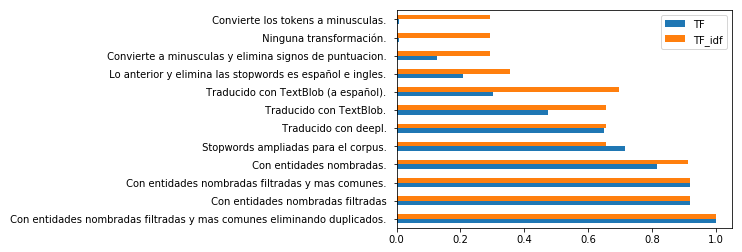

In [48]:
aux = pd.concat([df_tf, df_tf_idf], axis=1)
aux.columns = ('TF', 'TF_idf')
aux.sort_values(['TF', 'TF_idf'], ascending=False).plot(kind='barh')

Vemos como TF_idf resulta una métrica más robusta para la mayoría de los casos, dando un resultado digamos aceptable incluso sin aplicar ningún tipo de procesamiento al texto. Según vamos realizando procesamientos más complejos, la diferencias se van reduciendo, algo lógico si tenemos en cuenta que lo que pretendemos con estos procesamientos es seleccionar aquellos terminos más significativos, algo que ya intenta hacer TF_idf por si misma, por lo que resulta evidente que ambas métricas acaben convergiendo.

Cabe destacar que el uso de esta métrica requiere de unos recursos computacionales mayores a los que requiere TF.

<a id='Anexo I'></a>
# I Funciones auxiliares

Vamos a definir los métodos que vamos a utilizar para clusterizar los documentos. Hemos usado el código proporcionado en la práctica modificandolos un poco para así adaptarlo a la estrucura que queremos implementar en nuestro código, pero manteniendo la base.

In [46]:
def TF(document, unique_terms, collection):
    word_tf = []
    for word in unique_terms:
        word_tf.append(collection.tf(word, document))
    return word_tf


def TF_idf(document, unique_terms, collection):
    word_tf_idf = []
    for word in unique_terms:
        word_tf_idf.append(collection.tf_idf(word, document))
    return word_tf_idf


def cluster_texts(texts, cluster_number, distance, verbose=True, measure=TF):
    #Load the list of texts into a TextCollection object.
    collection = nltk.TextCollection(texts)

    #get a list of unique terms
    unique_terms = list(set(collection))

    if verbose:
        print("Creando collecion de %d terminos" % len(collection))
        print("Terminos unicos encontrados: ", len(unique_terms))

    ### And here we actually call the function and create our array of vectors.
    vectors = [numpy.array(measure(f,unique_terms, collection)) for f in texts]

    # initialize the clusterer
    clusterer = AgglomerativeClustering(n_clusters=cluster_number,
                                      linkage="average", affinity='cosine')
    clusters = clusterer.fit_predict(vectors)

    return clusters

Para gestionar los diferentes casos, hemos generado unos métodos y funciones de ayuda para simplemente implementar una función que reciba un fichero de entrada y devuelva la lista de términos que serán analizados por el algoritmo de clusterización.

In [47]:
'''
Decoradores auxiliares.
'''

def timer_decorator(func):
    def func_wrapper(*args, **kwargs):
        start = time()
        res = func(*args, **kwargs)
        end = time()
        diff_time = end - start
        if (diff_time < 60):
            print("Tiempo total de ejecución {:.2f} segundos".format(diff_time))
        else:
            print("Tiempo total de ejecución {:.2f} minutos".format(diff_time/60))
        return res
    return func_wrapper


cases = list()


def register_case(func):
    cases.append(func)
    def func_wrapper(*args):
        return func(*args)
    return func_wrapper


'''
Funciones auxiliares para pintar.
'''

def print_cases():
    print()
    for i, func in enumerate(cases):
        print('{} .- {}'.format(i + 1, func.__doc__))


def print_score(score):
    print("La puntuacion obtenida ha sido: ", score)


def print_clusters_table(test):
    df = pd.DataFrame.from_items([("Idiomas", LANG_REF), ("Ref.", REFERENCE),
            ("Test", test)], orient='index', columns=range(0, len(test) - 1))
    display(df)


'''
Evaluadores. Metodos usados para ejecutar los casos.
'''

def _evaluate(func, corpus_dir, verbose, measure):
    texts = []
    for path in sorted([f for f in os.listdir(corpus_dir)
                        if f.endswith(".txt")]):
        with open(os.path.join(corpus_dir, path), "r") as f_:
            tokens = func(f_)
            texts.append(nltk.Text(tokens))
    test = cluster_texts(texts, 5, "cosine", verbose, measure)
    if verbose:
        print_clusters_table(test)
    return adjusted_rand_score(REFERENCE, test)


@timer_decorator
def evaluate(func, corpus_dir="./corpus_text", measure=TF):
    return _evaluate(func, corpus_dir, True, measure)


def evaluate_all(corpus_dir="./corpus_text", measure=TF):
    scores = list()
    for case in cases:
        scores.append(_evaluate(case, corpus_dir, False, measure))

    df = pd.DataFrame(scores, columns=['Scores'],
                      index=[f.__doc__ for f in cases])
    return df
